In [8]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/wzhang/Documents/AgInjuryNews - cleaned.csv')

X = pd.DataFrame(dataset.iloc[:,0:14].values)
Y = pd.DataFrame(dataset.iloc[:,14:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

     0   1   2   3   4   5   6   7   8   9   10  11  12  13
0     1   3   1  79   7   0   0   0   0   0   0   0   0   0
1     3   2   1  84   6   0   0   0   0   0   0   0   0   0
2     3   1   1  87   7   0   0   0   0   0   0   0   0   0
3     3   2   2  65   7   0   0   0   0   0   0   0   0   0
4     3   1   1  63   7   0   0   0   0   0   0   0   0   0
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
966   1   3   1  63   1   0   0   0   0   0   0   0   0   0
967   1   2   1  64   7   0   0   0   0   0   0   0   0   0
968   1   2   1  85   6   0   0   0   0   0   0   0   0   0
969   3   3   1  77   7   0   0   1   0   0   0   0   0   0
970   1   2   1  64   7   0   0   0   0   0   0   0   0   0

[971 rows x 14 columns]
     0
0    1
1    1
2    1
3    0
4    1
..  ..
966  1
967  1
968  1
969  1
970  1

[971 rows x 1 columns]
(776, 14)
(776, 1)


In [9]:
features = pd.DataFrame(dataset.iloc[:,0:14])
features = features.columns
print(features)

Index(['Location ', 'Time ', 'Sex', 'Age', 'Injury_Agent', 'Confined Space',
       'Grain Involved', 'Drowning/Suffocation', 'Alcohol/Drugs', 'Seatbelt',
       'Helmet', 'ROPS', 'Agritourism', 'Other PPE'],
      dtype='object')


In [10]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import CategoricalNB 

In [11]:
model = CategoricalNB()
model.fit(X_train,Y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

In [13]:
res = model.predict(X_test)
print(res)
print(Y_test)

ValueError: Negative values in data passed to CategoricalNB (input X)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

0.7692307692307693
              precision    recall  f1-score   support

           0   0.750000  0.063830  0.117647        47
           1   0.769634  0.993243  0.867257       148

    accuracy                       0.769231       195
   macro avg   0.759817  0.528537  0.492452       195
weighted avg   0.764901  0.769231  0.686582       195



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 196it [00:13,  6.45it/s]                         


IndexError: index 13 is out of bounds for axis 0 with size 13

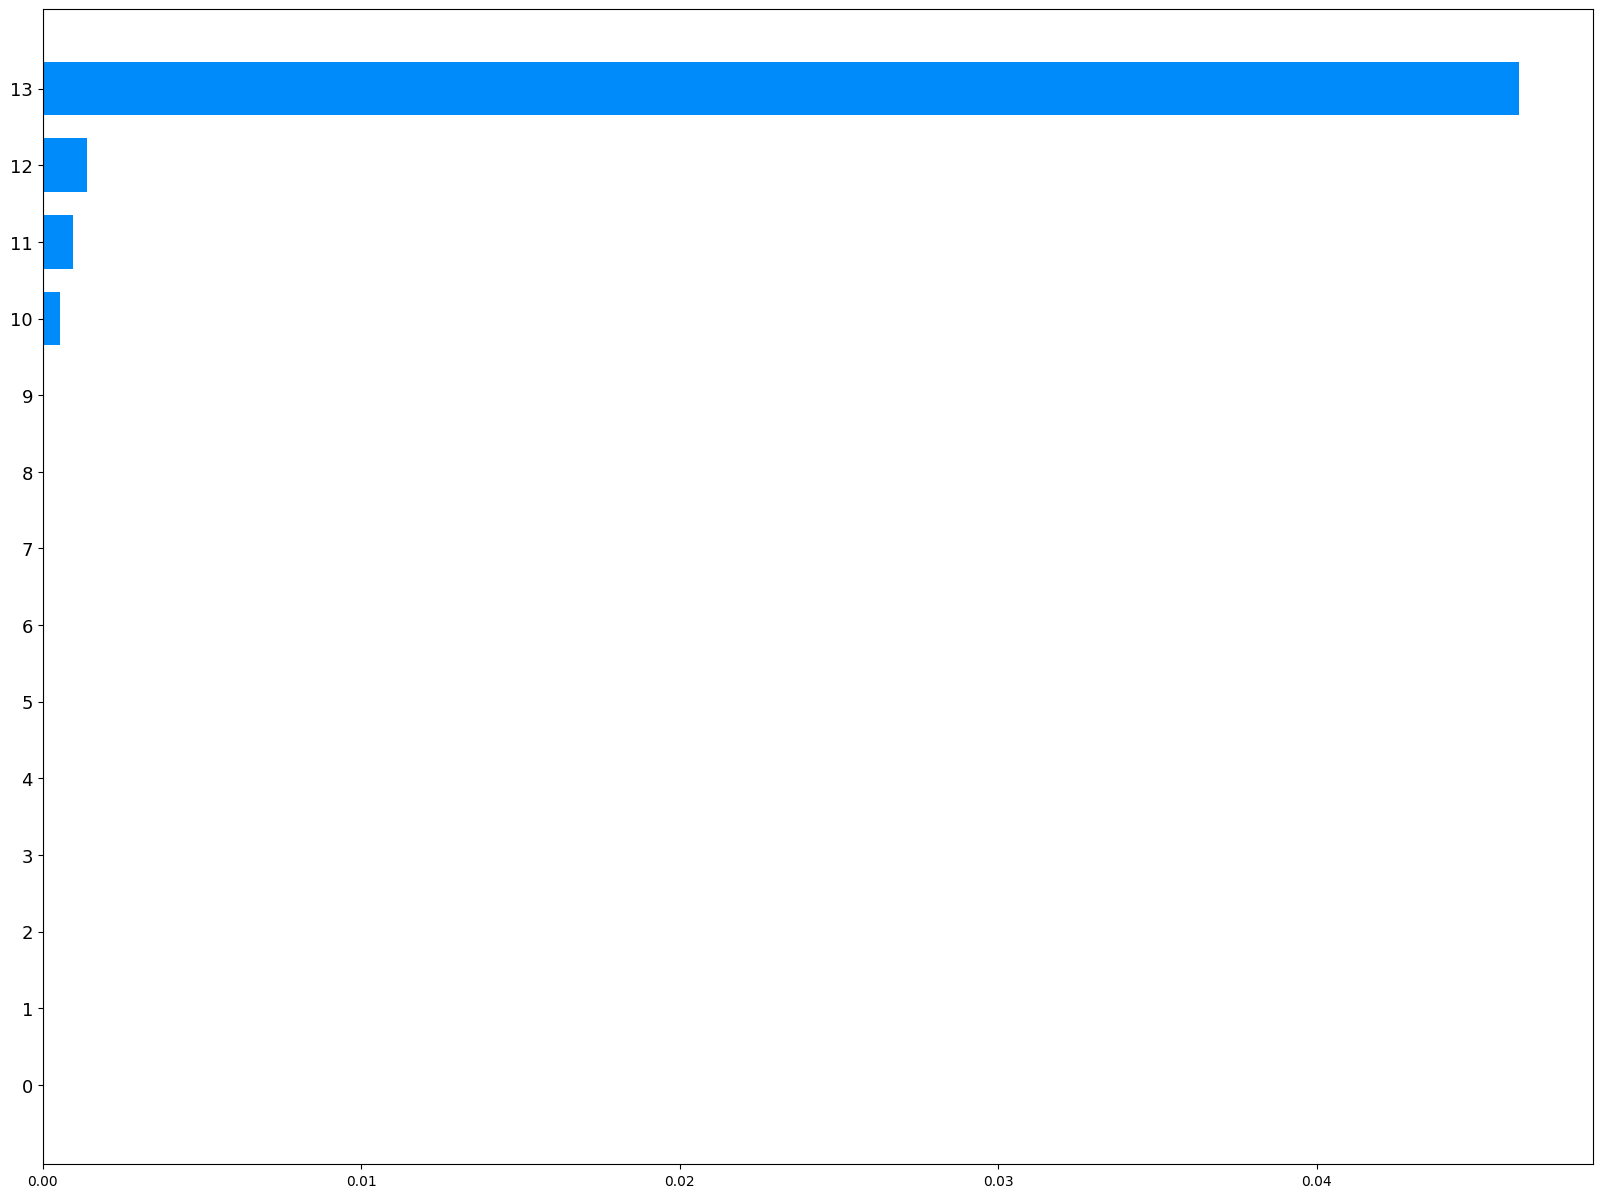

In [ ]:
import shap
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values,X_train,feature_names = features,plot_type="bar", plot_size=(20,15),show=False)